In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# **Импорт данных**

---






In [34]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big Data Project/full_import_dataset_with_libname.csv')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,project_name,import,is_kotlin_import,is_python_import,package
0,0,2dust#v2rayNG,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat
1,1,2dust#v2rayNG,android.view.MenuItem,1,0,android.view
2,2,2dust#v2rayNG,android.Manifest,1,0,android
3,3,2dust#v2rayNG,android.content.Intent,1,0,android.content
4,4,2dust#v2rayNG,android.net.Uri,1,0,android.net


# **Количество проектов и вывод топ-5 по проектам**

In [35]:
data["project_name"].count()

651822

In [36]:
data_project_count = data.groupby(['project_name'], axis =0)["Unnamed: 0"].count().reset_index(name="count").sort_values(by=['count'], ascending=False)

In [37]:
data_4_first = data_project_count.head(5)
data_4_first.head()

,project_name,count
2112,mozilla-mobile#fenix,24552
896,blockchain#My-Wallet-V3-Android,11219
2840,wordpress-mobile#WordPress-Android,10629
305,JetBrains#compose-jb,7996
1630,intellij-rust#intellij-rust,7655


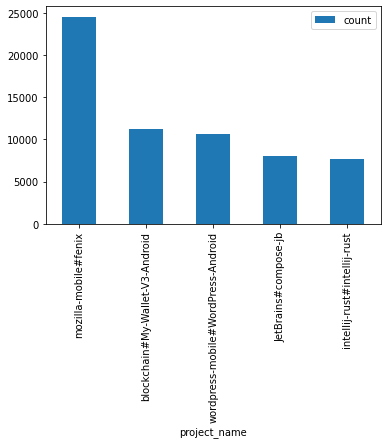

In [38]:
import matplotlib.pyplot as plt
data_4_first.plot.bar(x ='project_name', y='count')

# **Количество импортов для каждого проекта и вывод топ-5 по имортам**

In [39]:
data_project_import_and_count = data.groupby(['project_name','import'], axis =0)["import"].count().reset_index(name="import_count")
data_project_import_and_count.head(100)

,project_name,import,import_count
0,01joy#news-search-engine,bs4.BeautifulSoup,1
1,01joy#news-search-engine,configparser,1
2,01joy#news-search-engine,datetime,1
3,01joy#news-search-engine,datetime.date,1
4,01joy#news-search-engine,datetime.timedelta,1
...,...,...,...
95,0x00-0x00#ShellPop,obfuscators.randomize_vars,1
96,0x00-0x00#ShellPop,os,1
97,0x00-0x00#ShellPop,os.path,1
98,0x00-0x00#ShellPop,os.system,1


In [40]:
data_import_count = data_project_import_and_count.groupby('project_name')['import_count'].count().reset_index(name="import_count").sort_values(by=['import_count'], ascending=False)
data_import_count_top_5 = data_import_count.head(5)
data_import_count_top_5.head()

,project_name,import_count
1552,home-assistant#core,5443
1495,gtalarico#ironpython-stubs,4107
805,apache#airflow,1950
1630,intellij-rust#intellij-rust,1917
1197,doableware#djongo,1756


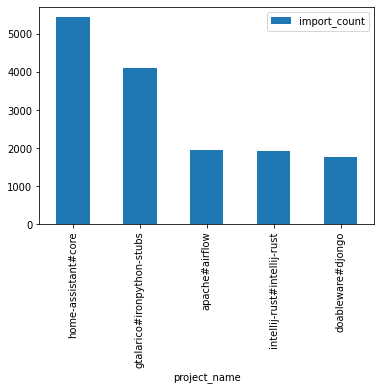

In [41]:
data_import_count_top_5.plot.bar(x ='project_name', y='import_count')

In [42]:
data_project_import_and_count_kotlin = data.groupby(['project_name','is_kotlin_import'], axis =0)['is_kotlin_import'].sum().reset_index(name="kotlin_import_count").sort_values(by=['kotlin_import_count'], ascending=False)
data_project_import_and_count_kotlin.head(5)

,project_name,is_kotlin_import,kotlin_import_count
2126,mozilla-mobile#fenix,1,24398
904,blockchain#My-Wallet-V3-Android,1,11219
2859,wordpress-mobile#WordPress-Android,1,10623
306,JetBrains#compose-jb,1,7996
1642,intellij-rust#intellij-rust,1,7578


In [43]:
data_project_import_and_count_python = data.groupby(['project_name','is_python_import'], axis =0)['is_python_import'].sum().reset_index(name="python_import_count").sort_values(by=['python_import_count'], ascending=False)
data_project_import_and_count_python.head(5)

,project_name,is_python_import,python_import_count
1563,home-assistant#core,1,5443
1505,gtalarico#ironpython-stubs,1,4107
2461,ray-project#ray,1,3874
1205,doableware#djongo,1,3512
1581,huggingface#transformers,1,3479


# **Package**

In [44]:
data_project_package = data.groupby(['project_name','package'], axis =0)["package"].count().reset_index(name="package_count")
data_project_package.head(100)

,project_name,package,package_count
0,01joy#news-search-engine,bs4,1
1,01joy#news-search-engine,datetime,2
2,01joy#news-search-engine,flask,3
3,01joy#news-search-engine,index,1
4,01joy#news-search-engine,jieba,1
...,...,...,...
95,1adrianb#face-alignment,distutils,1
96,1adrianb#face-alignment,enum,1
97,1adrianb#face-alignment,matplotlib,1
98,1adrianb#face-alignment,mpl_toolkits,1


In [45]:
data_package = data_project_package.groupby('project_name')['package_count'].count().reset_index(name="package_count").sort_values(by=['package_count'], ascending=False)
data_package.head()

,project_name,package_count
1468,gtalarico#ironpython-stubs,4069
1523,home-assistant#core,1059
201,FederatedAI#FATE,312
2465,saltstack#salt,255
2390,ray-project#ray,228
